In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score

import os as os
import matplotlib.pyplot as plt
import seaborn as sns
import numbers

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

In [2]:
os.getcwd()

'C:\\Users\\Mauri\\Downloads'

In [3]:
os.chdir('C:/Users/Mauri/Documents/Master Data Science and Society/Master Thesis DS&S/Data/Tennis Data Master Thesis/Thesis data section')

In [4]:
train_df = pd.read_csv('C:/Users/Mauri/Documents/Master Data Science and Society/Master Thesis DS&S/Data/Tennis Data Master Thesis/Thesis data section/Train/Train data combined 2015-2021.csv')

print(train_df.shape)

(55563, 52)


In [5]:
my_seed = 101
np.random.seed(my_seed)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55563 entries, 0 to 55562
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Source.Name               55563 non-null  object 
 1   tourney_id                55563 non-null  object 
 2   tourney_name              55563 non-null  object 
 3   surface                   55563 non-null  object 
 4   draw_size                 55563 non-null  int64  
 5   tourney_level             55563 non-null  object 
 6   tourney_date              55563 non-null  int64  
 7   match_num                 55563 non-null  int64  
 8   winner_id                 55563 non-null  int64  
 9   winner_seed               25001 non-null  float64
 10  winner_entry              7912 non-null   object 
 11  winner_name               55563 non-null  object 
 12  winner_hand               55556 non-null  object 
 13  winner_ht                 46885 non-null  float64
 14  winner

In [7]:
train_df.head()

,Source.Name,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,atp_matches_qual_chall_2015.csv,2015-1536,Madrid Masters,Clay,56,M,20150503,32283,104268,NaN,...,30.0,16.0,8.0,8.0,2.0,6.0,118.0,476.0,52.0,894.0
1,atp_matches_qual_chall_2015.csv,2015-1536,Madrid Masters,Clay,56,M,20150503,32284,106148,NaN,...,50.0,31.0,10.0,9.0,7.0,10.0,194.0,245.0,107.0,503.0
2,atp_matches_qual_chall_2015.csv,2015-1536,Madrid Masters,Clay,56,M,20150503,32285,105311,2.0,...,60.0,40.0,15.0,14.0,7.0,10.0,56.0,852.0,126.0,432.0
3,atp_matches_qual_chall_2015.csv,2015-1536,Madrid Masters,Clay,56,M,20150503,32286,105292,14.0,...,82.0,54.0,17.0,17.0,8.0,11.0,105.0,507.0,135.0,413.0
4,atp_matches_qual_chall_2015.csv,2015-1536,Madrid Masters,Clay,56,M,20150503,32287,104386,NaN,...,22.0,16.0,11.0,9.0,5.0,9.0,528.0,60.0,61.0,815.0


In [8]:
train2_df = train_df.drop(columns=['Source.Name','tourney_level','winner_age','loser_age',
                                   'winner_seed','loser_seed','winner_entry','loser_entry'])                                                    

In [9]:
train2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55563 entries, 0 to 55562
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tourney_id                55563 non-null  object 
 1   tourney_name              55563 non-null  object 
 2   surface                   55563 non-null  object 
 3   draw_size                 55563 non-null  int64  
 4   tourney_date              55563 non-null  int64  
 5   match_num                 55563 non-null  int64  
 6   winner_id                 55563 non-null  int64  
 7   winner_name               55563 non-null  object 
 8   winner_hand               55556 non-null  object 
 9   winner_ht                 46885 non-null  float64
 10  winner_ioc                55563 non-null  object 
 11  winner_age_years_CORRECT  55563 non-null  float64
 12  loser_id                  55563 non-null  int64  
 13  loser_name                55563 non-null  object 
 14  loser_

In [10]:
none_percent = train2_df.isnull().sum() * 100 / len(train2_df)
none_values_train2_df = pd.DataFrame({'Feature name': train2_df.columns, 'None values count': train2_df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_train2_df.reset_index().drop(columns=['index']))

                Feature name  None values count  None values percent
0                 tourney_id                  0             0.000000
1               tourney_name                  0             0.000000
2                    surface                  0             0.000000
3                  draw_size                  0             0.000000
4               tourney_date                  0             0.000000
5                  match_num                  0             0.000000
6                  winner_id                  0             0.000000
7                winner_name                  0             0.000000
8                winner_hand                  7             0.012598
9                  winner_ht               8678            15.618307
10                winner_ioc                  0             0.000000
11  winner_age_years_CORRECT                  0             0.000000
12                  loser_id                  0             0.000000
13                loser_name      

In [11]:
train2_df.dropna(subset=['winner_rank_points', 'loser_rank_points','winner_rank','loser_rank','winner_hand','minutes'], inplace=True)
train3_df = train2_df.reset_index(drop=True)
train3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46389 entries, 0 to 46388
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tourney_id                46389 non-null  object 
 1   tourney_name              46389 non-null  object 
 2   surface                   46389 non-null  object 
 3   draw_size                 46389 non-null  int64  
 4   tourney_date              46389 non-null  int64  
 5   match_num                 46389 non-null  int64  
 6   winner_id                 46389 non-null  int64  
 7   winner_name               46389 non-null  object 
 8   winner_hand               46389 non-null  object 
 9   winner_ht                 39664 non-null  float64
 10  winner_ioc                46389 non-null  object 
 11  winner_age_years_CORRECT  46389 non-null  float64
 12  loser_id                  46389 non-null  int64  
 13  loser_name                46389 non-null  object 
 14  loser_

In [12]:
none_percent = train3_df.isnull().sum() * 100 / len(train3_df)
none_values_train3_df = pd.DataFrame({'Feature name': train3_df.columns, 'None values count': train3_df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_train3_df.reset_index().drop(columns=['index']))

                Feature name  None values count  None values percent
0                 tourney_id                  0             0.000000
1               tourney_name                  0             0.000000
2                    surface                  0             0.000000
3                  draw_size                  0             0.000000
4               tourney_date                  0             0.000000
5                  match_num                  0             0.000000
6                  winner_id                  0             0.000000
7                winner_name                  0             0.000000
8                winner_hand                  0             0.000000
9                  winner_ht               6725            14.496971
10                winner_ioc                  0             0.000000
11  winner_age_years_CORRECT                  0             0.000000
12                  loser_id                  0             0.000000
13                loser_name      

In [13]:
train3_df = train3_df.drop(columns=['l_SvGms', 'w_SvGms', 'tourney_id', 'tourney_name',
                                    'winner_name', 'loser_name',])

In [14]:
train3_df = train3_df.rename(columns={"winner_age_years_CORRECT": "winner_age",
                                      "loser_age_years_CORRECT": "loser_age"},) 

In [15]:
train3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46389 entries, 0 to 46388
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             46389 non-null  object 
 1   draw_size           46389 non-null  int64  
 2   tourney_date        46389 non-null  int64  
 3   match_num           46389 non-null  int64  
 4   winner_id           46389 non-null  int64  
 5   winner_hand         46389 non-null  object 
 6   winner_ht           39664 non-null  float64
 7   winner_ioc          46389 non-null  object 
 8   winner_age          46389 non-null  float64
 9   loser_id            46389 non-null  int64  
 10  loser_hand          46371 non-null  object 
 11  loser_ht            34943 non-null  float64
 12  loser_ioc           46389 non-null  object 
 13  loser_age           46389 non-null  float64
 14  score               46389 non-null  object 
 15  best_of             46389 non-null  int64  
 16  roun

In [16]:
train3_df['tourney_year'] = train3_df.tourney_date.astype(str).str[:4].astype(int)
train3_df['tourney_month'] = train3_df.tourney_date.astype(str).str[4:6].astype(int)
train3_df = train3_df.drop(columns=['tourney_date'])

In [17]:
train3_df = train3_df.drop(columns=['score']) 

In [18]:
hand_encoder = LabelEncoder()
train3_df['loser_hand'] = hand_encoder.fit_transform(train3_df['loser_hand'].astype(str))
train3_df['winner_hand'] = hand_encoder.transform(train3_df['winner_hand'].astype(str))

train3_df['loser_ioc'] = LabelEncoder().fit_transform(train3_df['loser_ioc'].astype(str))
train3_df['winner_ioc'] = LabelEncoder().fit_transform(train3_df['winner_ioc'].astype(str))

train3_df['round'] = LabelEncoder().fit_transform(train3_df['round'].astype(str))

train3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46389 entries, 0 to 46388
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             46389 non-null  object 
 1   draw_size           46389 non-null  int64  
 2   match_num           46389 non-null  int64  
 3   winner_id           46389 non-null  int64  
 4   winner_hand         46389 non-null  int32  
 5   winner_ht           39664 non-null  float64
 6   winner_ioc          46389 non-null  int32  
 7   winner_age          46389 non-null  float64
 8   loser_id            46389 non-null  int64  
 9   loser_hand          46389 non-null  int32  
 10  loser_ht            34943 non-null  float64
 11  loser_ioc           46389 non-null  int32  
 12  loser_age           46389 non-null  float64
 13  best_of             46389 non-null  int64  
 14  round               46389 non-null  int32  
 15  minutes             46389 non-null  float64
 16  w_ac

In [19]:
train3_df.loc[train3_df["surface"] == "Clay", "surface"] = 0
train3_df.loc[train3_df["surface"] == "Hard", "surface"] = 1
train3_df.loc[train3_df["surface"] == "Grass", "surface"] = 2
train3_df.loc[train3_df["surface"] == "Carpet", "surface"] = 4

In [20]:
train3_df_imputed = pd.DataFrame(SimpleImputer().fit_transform(train3_df))
train3_df_imputed.columns = train3_df.columns
train3_df_imputed.index = train3_df.index
train3_df = train3_df_imputed.copy()

train3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46389 entries, 0 to 46388
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             46389 non-null  float64
 1   draw_size           46389 non-null  float64
 2   match_num           46389 non-null  float64
 3   winner_id           46389 non-null  float64
 4   winner_hand         46389 non-null  float64
 5   winner_ht           46389 non-null  float64
 6   winner_ioc          46389 non-null  float64
 7   winner_age          46389 non-null  float64
 8   loser_id            46389 non-null  float64
 9   loser_hand          46389 non-null  float64
 10  loser_ht            46389 non-null  float64
 11  loser_ioc           46389 non-null  float64
 12  loser_age           46389 non-null  float64
 13  best_of             46389 non-null  float64
 14  round               46389 non-null  float64
 15  minutes             46389 non-null  float64
 16  w_ac

In [21]:
train3_df = train3_df.rename(columns={"loser_age": "first_age", "loser_entry": "first_entry", "loser_hand": "first_hand",
                       "loser_ht": "first_ht", "loser_id": "first_id", "loser_ioc": "first_ioc",
                       "loser_rank": "first_rank", "loser_rank_points": "first_rank_points",
                       "loser_seed": "first_seed", "l_ace": "first_ace", "l_df": "first_df",
                       "l_svpt": "first_svpt", "l_1stIn": "first_1stIn", "l_1stWon": "first_1stWon",
                       "l_2ndWon": "first_2ndWon", "l_bpSaved": "first_bpSaved", "l_bpFaced": "first_bpFaced",   
                
                       "winner_age": "second_age", "winner_entry": "second_entry","winner_hand": "second_hand",
                       "winner_ht": "second_ht", "winner_id": "second_id", "winner_ioc": "second_ioc",
                       "winner_rank": "second_rank", "winner_rank_points": "second_rank_points",
                       "winner_seed": "second_seed", "w_ace": "second_ace", "w_df": "second_df",
                       "w_svpt": "second_svpt", "w_1stIn": "second_1stIn", "w_1stWon": "second_1stWon",
                       "w_2ndWon": "second_2ndWon", "w_bpSaved": "second_bpSaved", "w_bpFaced": "second_bpFaced"
                       },)


In [22]:
copy_2_df = train3_df.copy()
copy_2_df[[ 'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points', 'first_ace', 'first_df', 'first_svpt', 'first_1stIn', 'first_1stWon',
            'first_2ndWon', 'first_bpSaved', 'first_bpFaced',
            'second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points', 'second_ace', 'second_df', 'second_svpt', 'second_1stIn', 'second_1stWon',
            'second_2ndWon', 'second_bpSaved', 'second_bpFaced']]\
=copy_2_df[['second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points','second_ace', 'second_df', 'second_svpt', 'second_1stIn', 'second_1stWon',
            'second_2ndWon', 'second_bpSaved', 'second_bpFaced',
            'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points','first_ace', 'first_df', 'first_svpt', 'first_1stIn', 'first_1stWon',
            'first_2ndWon', 'first_bpSaved', 'first_bpFaced']]

In [23]:
winner_player2 = np.zeros(train3_df.shape[0]) # second player wins so label=0
train3_df['label'] = winner_player2


winner_player1 = np.ones(copy_2_df.shape[0]) # first player wins so label=1
copy_2_df['label'] = winner_player1 

train3_df = pd.concat([train3_df,copy_2_df])

train4_df = train3_df.sample(frac=1).reset_index(drop=True)
train4_df

,surface,draw_size,match_num,second_id,second_hand,second_ht,second_ioc,second_age,first_id,first_hand,...,first_2ndWon,first_bpSaved,first_bpFaced,second_rank,second_rank_points,first_rank,first_rank_points,tourney_year,tourney_month,label
0,0.0,32.0,66713.0,104620.0,1.0,183.000000,40.0,32.4,105413.0,1.0,...,8.0,3.0,8.0,165.0,332.0,121.0,467.0,2018.0,3.0,0.0
1,1.0,32.0,54785.0,200221.0,1.0,183.000000,27.0,18.4,104312.0,1.0,...,10.0,4.0,4.0,471.0,76.0,89.0,611.0,2017.0,11.0,1.0
2,1.0,32.0,76964.0,124116.0,1.0,191.000000,3.0,23.4,105806.0,1.0,...,22.0,1.0,3.0,165.0,303.0,250.0,182.0,2019.0,10.0,0.0
3,0.0,32.0,60455.0,128034.0,1.0,196.000000,59.0,21.5,106228.0,1.0,...,19.0,5.0,13.0,109.0,515.0,123.0,455.0,2018.0,9.0,0.0
4,0.0,32.0,84279.0,200384.0,0.0,173.000000,27.0,20.7,123896.0,2.0,...,22.0,7.0,13.0,165.0,435.0,356.0,126.0,2021.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92773,1.0,32.0,42520.0,105958.0,1.0,185.431323,63.0,24.1,104783.0,1.0,...,13.0,4.0,7.0,1102.0,9.0,715.0,35.0,2016.0,5.0,0.0
92774,0.0,32.0,67165.0,106072.0,1.0,178.000000,72.0,25.7,106210.0,0.0,...,22.0,7.0,9.0,193.0,293.0,92.0,640.0,2018.0,8.0,1.0
92775,1.0,32.0,77646.0,105633.0,1.0,183.000000,25.0,30.1,105216.0,1.0,...,11.0,2.0,3.0,151.0,410.0,101.0,689.0,2020.0,10.0,1.0
92776,1.0,64.0,77834.0,105911.0,0.0,185.000000,2.0,27.9,104970.0,1.0,...,13.0,1.0,3.0,190.0,260.0,219.0,217.0,2020.0,1.0,1.0


In [24]:
train4_df = train4_df.drop(columns=['first_id', 'second_id'])

In [25]:
train4_df = train4_df.drop_duplicates(subset=['match_num'])

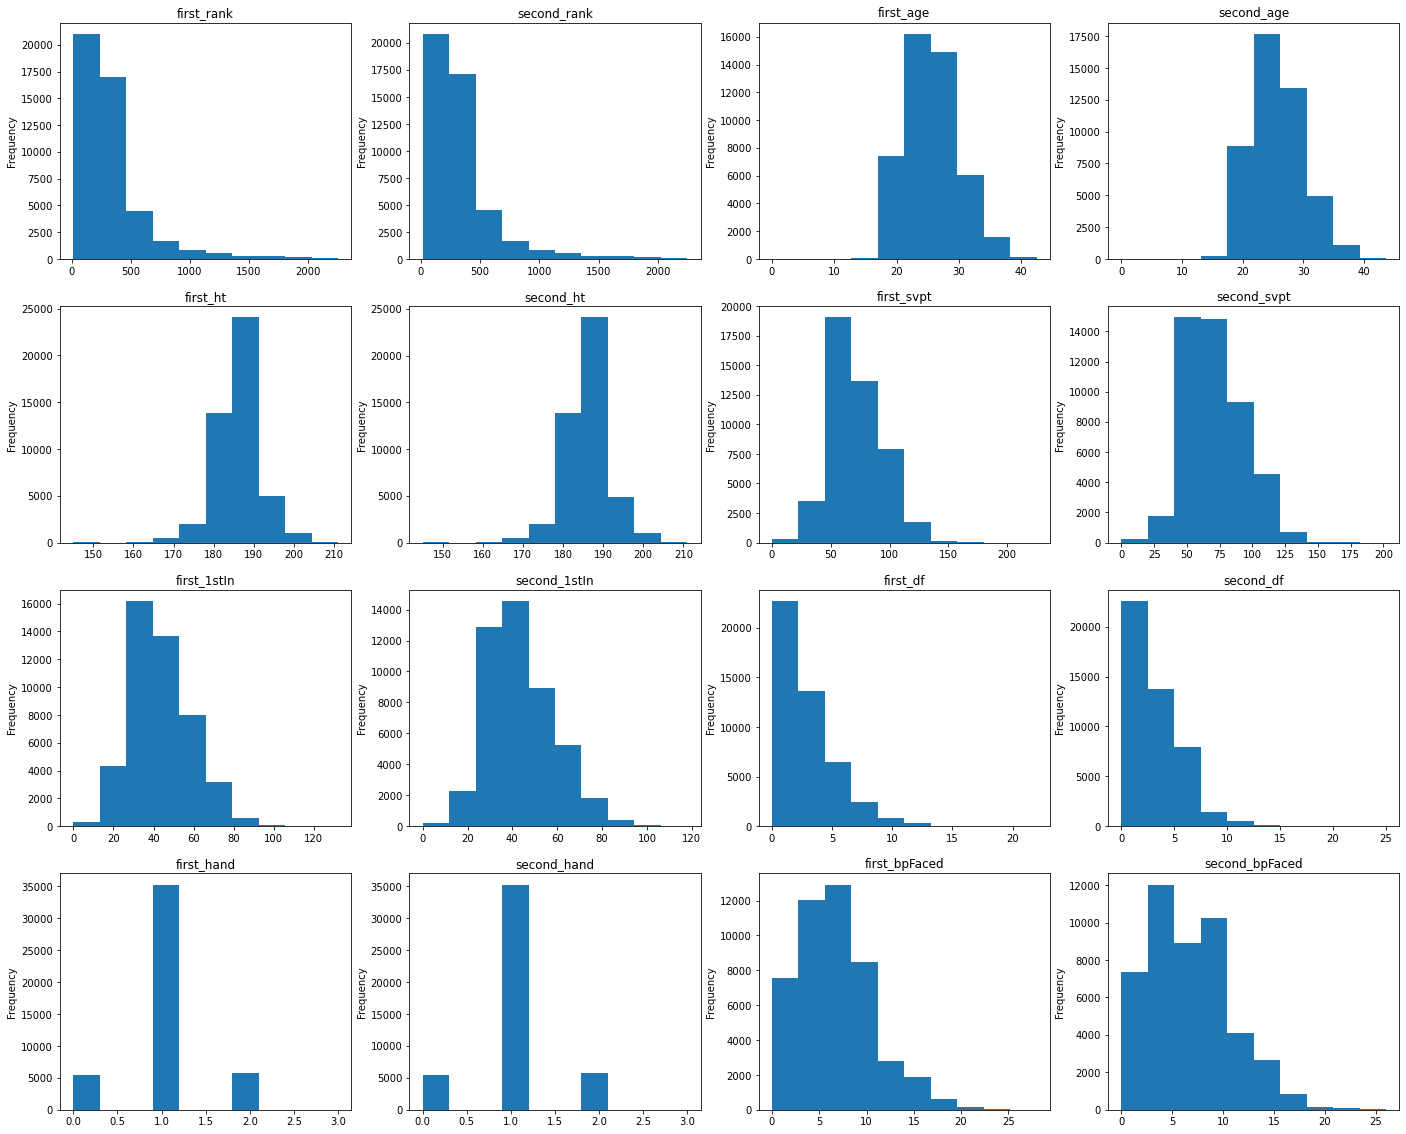

In [26]:
dimensions = ['first_rank','second_rank','first_age','second_age','first_ht',
'second_ht','first_svpt','second_svpt','first_1stIn','second_1stIn','first_df','second_df', 'first_hand', 'second_hand',
'first_bpFaced', 'second_bpFaced']
plt.figure(1, figsize=(24,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    train4_df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

plt.savefig('bar_plot.pdf')  

In [27]:
train4_df_imputed = pd.DataFrame(SimpleImputer().fit_transform(train4_df))
train4_df_imputed.columns = train4_df.columns
train4_df_imputed.index = train4_df.index
train4_df = train4_df_imputed.copy()

train4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46389 entries, 0 to 92014
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             46389 non-null  float64
 1   draw_size           46389 non-null  float64
 2   match_num           46389 non-null  float64
 3   second_hand         46389 non-null  float64
 4   second_ht           46389 non-null  float64
 5   second_ioc          46389 non-null  float64
 6   second_age          46389 non-null  float64
 7   first_hand          46389 non-null  float64
 8   first_ht            46389 non-null  float64
 9   first_ioc           46389 non-null  float64
 10  first_age           46389 non-null  float64
 11  best_of             46389 non-null  float64
 12  round               46389 non-null  float64
 13  minutes             46389 non-null  float64
 14  second_ace          46389 non-null  float64
 15  second_df           46389 non-null  float64
 16  seco

In [28]:
train4_df = train4_df.drop(columns=['first_1stWon', 'second_1stWon', 'first_2ndWon',
                                    'second_2ndWon', 'first_bpSaved', 'second_bpSaved',
                                    'tourney_year', 'tourney_month', 'match_num'])

In [29]:
df_stats = pd.DataFrame({'mean': train4_df.mean(),
                         'std': train4_df.std(),
                         'min': train4_df.min(),
                         'max': train4_df.max()})


print(df_stats)

                          mean         std    min     max
surface               0.605812    0.551048    0.0     4.0
draw_size            42.432128   21.847322   28.0   128.0
second_hand           1.005950    0.491331    0.0     3.0
second_ht           185.365121    5.611832  145.0   211.0
second_ioc           38.189506   25.996733    0.0    91.0
second_age           25.635528    4.265822    0.0    43.6
first_hand            1.006553    0.491148    0.0     3.0
first_ht            185.369639    5.631383  145.0   211.0
first_ioc            37.834142   25.888873    0.0    91.0
first_age            25.643092    4.247007    0.0    42.5
best_of               3.000690    0.037137    3.0     5.0
round                 4.137037    2.237783    0.0     8.0
minutes              95.340447   39.128191    0.0  4756.0
second_ace            4.393026    3.874999    0.0    52.0
second_df             2.995957    2.324765    0.0    25.0
second_svpt          71.232719   21.948525    0.0   202.0
second_1stIn  

In [30]:
subset_df = train4_df.sample(frac=0.05)

In [31]:
y = train4_df['label']
df_X = train4_df.drop(columns='label')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)

In [33]:
scaler = MinMaxScaler()

scaler.fit_transform(X_train)

scaler.transform(X_test)

array([[0.        , 0.36      , 0.33333333, ..., 0.12898815, 0.12488849,
        0.05834093],
       [0.25      , 0.04      , 0.33333333, ..., 0.06700091, 0.04237288,
        0.24749316],
       [0.25      , 0.04      , 0.33333333, ..., 0.26298997, 0.06155219,
        0.15223336],
       ...,
       [0.25      , 0.04      , 0.        , ..., 0.16499544, 0.0544157 ,
        0.19598906],
       [0.25      , 0.04      , 0.33333333, ..., 0.05834093, 0.04727921,
        0.20692799],
       [0.        , 0.04      , 0.33333333, ..., 0.00045579, 0.05932203,
        0.17183227]])

In [34]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

param_grid_SVM = {
    "svm__C": [0.1, 1, 10],
    "svm__gamma": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"],
}

In [35]:
grid_search_SVM = GridSearchCV(pipe, param_grid_SVM, cv=5, return_train_score=True)
grid_search_SVM.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_SVM.best_params_)

Best hyperparameters: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}


In [36]:
def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

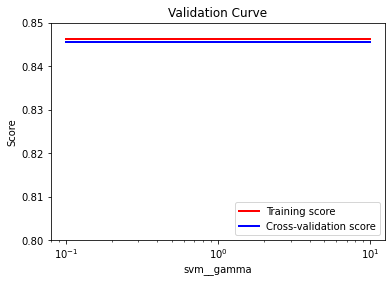

In [37]:
plot_grid_search_validation_curve(grid_search_SVM, "svm__gamma", log=True, ylim=(.8, .85))

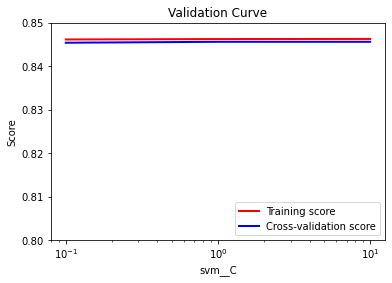

In [38]:
plot_grid_search_validation_curve(grid_search_SVM, "svm__C", log=True, ylim=(.8, .85))

In [39]:
best_svm = grid_search_SVM.best_estimator_

In [40]:
accuracy_SVM = best_svm.score(X_test, y_test)
print("accuracy_SVM: {:.2f}%".format(accuracy_SVM * 100))

y_pred_SVM = best_svm.predict(X_test)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

accuracy_SVM: 84.67%
Precision: 84.68
Recall: 84.64


In [41]:
print(confusion_matrix(y_test,y_pred_SVM))

[[3933  710]
 [ 712 3923]]


In [42]:
result = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=0)

sorted_idx = result.importances_mean.argsort()[::-1]

for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {result.importances_mean[idx]:.3f} +/- {result.importances_std[idx]:.3f}")

first_bpFaced: 0.192 +/- 0.004
second_bpFaced: 0.187 +/- 0.004
second_svpt: 0.103 +/- 0.002
first_svpt: 0.097 +/- 0.003
first_ace: 0.013 +/- 0.002
second_ace: 0.012 +/- 0.002
first_1stIn: 0.011 +/- 0.002
second_1stIn: 0.009 +/- 0.001
second_df: 0.008 +/- 0.001
first_df: 0.006 +/- 0.001
second_rank: 0.005 +/- 0.001
first_ioc: 0.004 +/- 0.001
first_rank: 0.004 +/- 0.001
first_rank_points: 0.004 +/- 0.001
second_ioc: 0.002 +/- 0.001
second_rank_points: 0.002 +/- 0.001
first_age: 0.002 +/- 0.001
first_ht: 0.002 +/- 0.001
second_ht: 0.001 +/- 0.001
first_hand: 0.001 +/- 0.001
second_hand: 0.001 +/- 0.001
second_age: 0.000 +/- 0.000
draw_size: 0.000 +/- 0.000
surface: 0.000 +/- 0.000
round: 0.000 +/- 0.000
best_of: 0.000 +/- 0.000
minutes: -0.000 +/- 0.000


In [43]:
pipe = Pipeline([
      ("rf", RandomForestClassifier(random_state=42))
])

param_grid_RF = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth": [None, 5, 10, 20],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [2, 5, 10]
}

In [44]:
grid_search_RF = GridSearchCV(pipe, param_grid=param_grid_RF, cv=5, return_train_score=True)
grid_search_RF.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_RF.best_params_)

Best hyperparameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


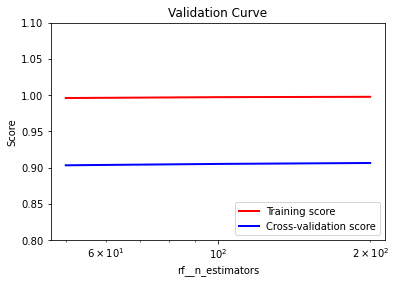

In [45]:
plot_grid_search_validation_curve(grid_search_RF, "rf__n_estimators", log=True, ylim=(.8, 1.1))

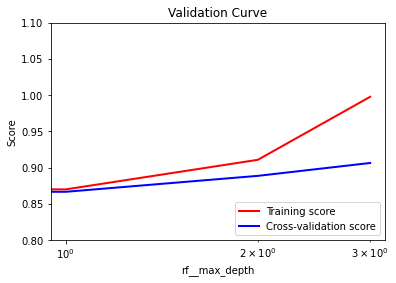

In [46]:
plot_grid_search_validation_curve(grid_search_RF, "rf__max_depth", log=True, ylim=(.8, 1.1))

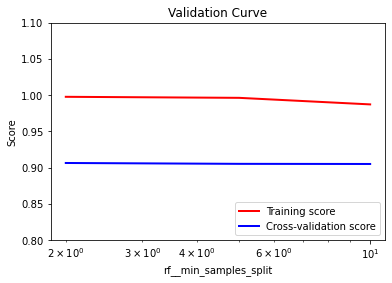

In [47]:
plot_grid_search_validation_curve(grid_search_RF, "rf__min_samples_split", log=True, ylim=(.8, 1.1))

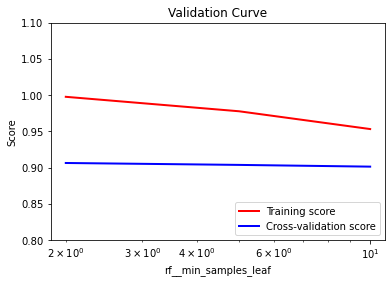

In [48]:
plot_grid_search_validation_curve(grid_search_RF, "rf__min_samples_leaf", log=True, ylim=(.8, 1.1))

In [49]:
best_RF = grid_search_RF.best_estimator_

In [50]:
accuracy_RF = best_RF.score(X_test, y_test)
print("Accuracy_RF: {:.2f}%".format(accuracy_RF * 100))

y_pred_RF = best_RF.predict(X_test)
precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Accuracy_RF: 91.16%
Precision: 91.42
Recall: 90.83


In [51]:
print(confusion_matrix(y_test,y_pred_RF))

[[4248  395]
 [ 425 4210]]


In [52]:
result = permutation_importance(best_RF, X_test, y_test, n_repeats=10, random_state=0)

sorted_idx = result.importances_mean.argsort()[::-1]

for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {result.importances_mean[idx]:.3f} +/- {result.importances_std[idx]:.3f}")

second_bpFaced: 0.107 +/- 0.003
first_bpFaced: 0.106 +/- 0.002
second_ioc: 0.051 +/- 0.001
first_ioc: 0.049 +/- 0.002
first_ht: 0.026 +/- 0.001
second_ht: 0.022 +/- 0.002
first_1stIn: 0.006 +/- 0.001
first_svpt: 0.005 +/- 0.001
second_1stIn: 0.004 +/- 0.001
second_svpt: 0.004 +/- 0.001
first_ace: 0.003 +/- 0.001
second_ace: 0.003 +/- 0.001
minutes: 0.002 +/- 0.001
first_df: 0.001 +/- 0.001
surface: 0.000 +/- 0.000
second_rank: 0.000 +/- 0.001
first_hand: 0.000 +/- 0.000
second_df: 0.000 +/- 0.001
first_age: 0.000 +/- 0.001
best_of: 0.000 +/- 0.000
second_hand: -0.000 +/- 0.001
second_age: -0.000 +/- 0.000
draw_size: -0.000 +/- 0.000
second_rank_points: -0.000 +/- 0.001
first_rank: -0.000 +/- 0.001
round: -0.001 +/- 0.000
first_rank_points: -0.001 +/- 0.001


In [53]:
pipe = Pipeline([
        ("mlp", MLPClassifier(random_state=42))
])

param_grid_MLP = {
    "mlp__hidden_layer_sizes": [(5,), (15,), (25,)],
    "mlp__activation": ["logistic", "tanh", "relu"],
    "mlp__alpha": [0.0001, 0.001, 0.01],
    "mlp__max_iter": [500, 1500, 2000],
}

In [54]:
grid_search_MLP = GridSearchCV(pipe, param_grid=param_grid_MLP, cv=5, return_train_score=True )
grid_search_MLP.fit(X_train, y_train)
print("Best hyperparameters:", grid_search_MLP.best_params_)

Best hyperparameters: {'mlp__activation': 'logistic', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (15,), 'mlp__max_iter': 500}


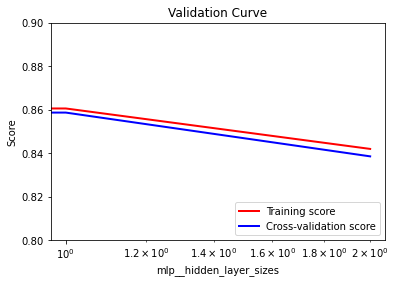

In [55]:
plot_grid_search_validation_curve(grid_search_MLP, "mlp__hidden_layer_sizes", log=True, ylim=(.8, .9))

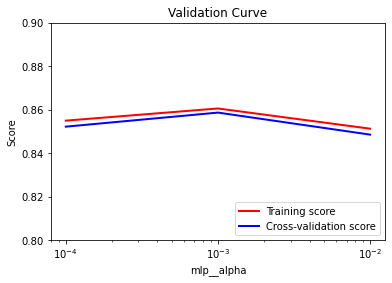

In [56]:
plot_grid_search_validation_curve(grid_search_MLP, "mlp__alpha", log=True, ylim=(.8, .9))

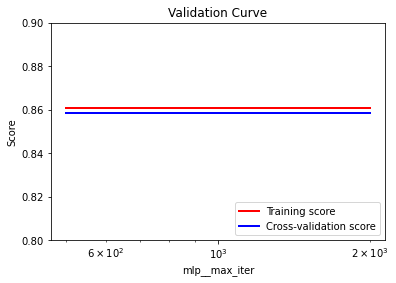

In [57]:
plot_grid_search_validation_curve(grid_search_MLP, "mlp__max_iter", log=True, ylim=(.8, .9))

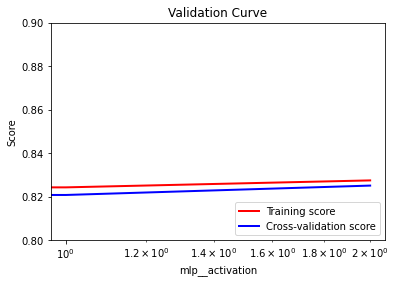

In [58]:
plot_grid_search_validation_curve(grid_search_MLP, "mlp__activation", log=True, ylim=(.8, .9))

In [59]:
best_MLP = grid_search_MLP.best_estimator_

In [60]:
accuracy_MLP = best_MLP.score(X_test, y_test)
print("Accuracy_MLP: {:.2f}%".format(accuracy_MLP * 100))

y_pred_MLP = best_MLP.predict(X_test)
precision = precision_score(y_test, y_pred_MLP)
recall = recall_score(y_test, y_pred_MLP)
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Accuracy_MLP: 85.52%
Precision: 84.93
Recall: 86.34


In [61]:
print(confusion_matrix(y_test,y_pred_MLP))

[[3933  710]
 [ 633 4002]]


In [62]:
result = permutation_importance(best_MLP, X_test, y_test, n_repeats=10, random_state=0)

sorted_idx = result.importances_mean.argsort()[::-1]

for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {result.importances_mean[idx]:.3f} +/- {result.importances_std[idx]:.3f}")

first_bpFaced: 0.194 +/- 0.003
second_bpFaced: 0.181 +/- 0.004
second_svpt: 0.097 +/- 0.002
first_svpt: 0.091 +/- 0.003
second_ioc: 0.017 +/- 0.001
second_ace: 0.014 +/- 0.003
second_1stIn: 0.012 +/- 0.001
first_ace: 0.012 +/- 0.001
first_1stIn: 0.005 +/- 0.002
second_df: 0.005 +/- 0.001
first_df: 0.004 +/- 0.001
first_ioc: 0.004 +/- 0.001
second_rank_points: 0.003 +/- 0.001
first_rank_points: 0.003 +/- 0.002
first_ht: 0.001 +/- 0.001
second_ht: 0.001 +/- 0.001
second_hand: 0.001 +/- 0.000
first_rank: 0.000 +/- 0.001
second_rank: 0.000 +/- 0.001
second_age: 0.000 +/- 0.001
first_age: 0.000 +/- 0.001
best_of: -0.000 +/- 0.000
first_hand: -0.000 +/- 0.001
round: -0.000 +/- 0.000
minutes: -0.000 +/- 0.000
surface: -0.000 +/- 0.000
draw_size: -0.001 +/- 0.000


In [63]:
ATP_test_df = pd.read_csv('C:/Users/Mauri/Documents/Master Data Science and Society/Master Thesis DS&S/Data/Tennis Data Master Thesis/Thesis data section/Test/atp_matches_2022.csv')

In [64]:
ATP_test_df = ATP_test_df.drop(columns=['tourney_level', 'winner_seed','loser_seed','winner_entry','loser_entry'])  

In [65]:
ATP_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2917 non-null   object 
 1   tourney_name        2917 non-null   object 
 2   surface             2917 non-null   object 
 3   draw_size           2917 non-null   int64  
 4   tourney_date        2917 non-null   int64  
 5   match_num           2917 non-null   int64  
 6   winner_id           2917 non-null   int64  
 7   winner_name         2917 non-null   object 
 8   winner_hand         2915 non-null   object 
 9   winner_ht           2848 non-null   float64
 10  winner_ioc          2917 non-null   object 
 11  winner_age          2915 non-null   float64
 12  loser_id            2917 non-null   int64  
 13  loser_name          2917 non-null   object 
 14  loser_hand          2914 non-null   object 
 15  loser_ht            2769 non-null   float64
 16  loser_

In [66]:
none_percent = ATP_test_df.isnull().sum() * 100 / len(train2_df)
none_values_ATP_test_df = pd.DataFrame({'Feature name': ATP_test_df.columns, 'None values count': ATP_test_df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_ATP_test_df.reset_index().drop(columns=['index']))

          Feature name  None values count  None values percent
0           tourney_id                  0             0.000000
1         tourney_name                  0             0.000000
2              surface                  0             0.000000
3            draw_size                  0             0.000000
4         tourney_date                  0             0.000000
5            match_num                  0             0.000000
6            winner_id                  0             0.000000
7          winner_name                  0             0.000000
8          winner_hand                  2             0.004311
9            winner_ht                 69             0.148742
10          winner_ioc                  0             0.000000
11          winner_age                  2             0.004311
12            loser_id                  0             0.000000
13          loser_name                  0             0.000000
14          loser_hand                  3             0

In [67]:
ATP_test_df.dropna(subset=['winner_rank_points', 'loser_rank_points','winner_rank','loser_rank','winner_hand','minutes'], inplace=True)
ATP_test2_df = ATP_test_df.reset_index(drop=True)
ATP_test2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2628 non-null   object 
 1   tourney_name        2628 non-null   object 
 2   surface             2628 non-null   object 
 3   draw_size           2628 non-null   int64  
 4   tourney_date        2628 non-null   int64  
 5   match_num           2628 non-null   int64  
 6   winner_id           2628 non-null   int64  
 7   winner_name         2628 non-null   object 
 8   winner_hand         2628 non-null   object 
 9   winner_ht           2588 non-null   float64
 10  winner_ioc          2628 non-null   object 
 11  winner_age          2628 non-null   float64
 12  loser_id            2628 non-null   int64  
 13  loser_name          2628 non-null   object 
 14  loser_hand          2628 non-null   object 
 15  loser_ht            2536 non-null   float64
 16  loser_

In [68]:
ATP_test2_df = ATP_test2_df.drop(columns=['l_SvGms', 'w_SvGms', 'tourney_id', 'tourney_name',
                                    'winner_name', 'loser_name',])

In [69]:
ATP_test2_df = ATP_test2_df.drop(columns=['tourney_date', 'score'])

In [70]:
hand_encoder = LabelEncoder()
ATP_test2_df['loser_hand'] = hand_encoder.fit_transform(ATP_test2_df['loser_hand'].astype(str))
ATP_test2_df['winner_hand'] = hand_encoder.transform(ATP_test2_df['winner_hand'].astype(str))

ATP_test2_df['loser_ioc'] = LabelEncoder().fit_transform(ATP_test2_df['loser_ioc'].astype(str))
ATP_test2_df['winner_ioc'] = LabelEncoder().fit_transform(ATP_test2_df['winner_ioc'].astype(str))

ATP_test2_df['round'] = LabelEncoder().fit_transform(ATP_test2_df['round'].astype(str))

ATP_test2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             2628 non-null   object 
 1   draw_size           2628 non-null   int64  
 2   match_num           2628 non-null   int64  
 3   winner_id           2628 non-null   int64  
 4   winner_hand         2628 non-null   int32  
 5   winner_ht           2588 non-null   float64
 6   winner_ioc          2628 non-null   int32  
 7   winner_age          2628 non-null   float64
 8   loser_id            2628 non-null   int64  
 9   loser_hand          2628 non-null   int32  
 10  loser_ht            2536 non-null   float64
 11  loser_ioc           2628 non-null   int32  
 12  loser_age           2627 non-null   float64
 13  best_of             2628 non-null   int64  
 14  round               2628 non-null   int32  
 15  minutes             2628 non-null   float64
 16  w_ace 

In [71]:
ATP_test2_df.loc[ATP_test2_df["surface"] == "Clay", "surface"] = 0
ATP_test2_df.loc[ATP_test2_df["surface"] == "Hard", "surface"] = 1
ATP_test2_df.loc[ATP_test2_df["surface"] == "Grass", "surface"] = 2

In [72]:
ATP_test2_imputed = pd.DataFrame(SimpleImputer().fit_transform(ATP_test2_df))
ATP_test2_imputed.columns = ATP_test2_df.columns
ATP_test2_imputed.index = ATP_test2_df.index
ATP_test2_df = ATP_test2_imputed.copy()

ATP_test2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             2628 non-null   float64
 1   draw_size           2628 non-null   float64
 2   match_num           2628 non-null   float64
 3   winner_id           2628 non-null   float64
 4   winner_hand         2628 non-null   float64
 5   winner_ht           2628 non-null   float64
 6   winner_ioc          2628 non-null   float64
 7   winner_age          2628 non-null   float64
 8   loser_id            2628 non-null   float64
 9   loser_hand          2628 non-null   float64
 10  loser_ht            2628 non-null   float64
 11  loser_ioc           2628 non-null   float64
 12  loser_age           2628 non-null   float64
 13  best_of             2628 non-null   float64
 14  round               2628 non-null   float64
 15  minutes             2628 non-null   float64
 16  w_ace 

In [73]:
ATP_test2_df = ATP_test2_df.rename(columns={"loser_age": "first_age", "loser_entry": "first_entry", "loser_hand": "first_hand",
                       "loser_ht": "first_ht", "loser_id": "first_id", "loser_ioc": "first_ioc",
                       "loser_rank": "first_rank", "loser_rank_points": "first_rank_points",
                       "loser_seed": "first_seed", "l_ace": "first_ace", "l_df": "first_df",
                       "l_svpt": "first_svpt", "l_1stIn": "first_1stIn", "l_1stWon": "first_1stWon",
                       "l_2ndWon": "first_2ndWon", "l_bpSaved": "first_bpSaved", "l_bpFaced": "first_bpFaced",   
                
                       "winner_age": "second_age", "winner_entry": "second_entry","winner_hand": "second_hand",
                       "winner_ht": "second_ht", "winner_id": "second_id", "winner_ioc": "second_ioc",
                       "winner_rank": "second_rank", "winner_rank_points": "second_rank_points",
                       "winner_seed": "second_seed", "w_ace": "second_ace", "w_df": "second_df",
                       "w_svpt": "second_svpt", "w_1stIn": "second_1stIn", "w_1stWon": "second_1stWon",
                       "w_2ndWon": "second_2ndWon", "w_bpSaved": "second_bpSaved", "w_bpFaced": "second_bpFaced"
                       },)

In [74]:
ATP_copy__df = ATP_test2_df.copy()
ATP_copy__df[[ 'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points', 'first_ace', 'first_df', 'first_svpt', 'first_1stIn', 'first_1stWon',
            'first_2ndWon', 'first_bpSaved', 'first_bpFaced',
            'second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points', 'second_ace', 'second_df', 'second_svpt', 'second_1stIn', 'second_1stWon',
            'second_2ndWon', 'second_bpSaved', 'second_bpFaced']]\
=ATP_copy__df[['second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points','second_ace', 'second_df', 'second_svpt', 'second_1stIn', 'second_1stWon',
            'second_2ndWon', 'second_bpSaved', 'second_bpFaced',
            'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points','first_ace', 'first_df', 'first_svpt', 'first_1stIn', 'first_1stWon',
            'first_2ndWon', 'first_bpSaved', 'first_bpFaced']]

In [75]:
winner_player2 = np.zeros(ATP_test2_df.shape[0]) # second player wins so label=0
ATP_test2_df['label'] = winner_player2


winner_player1 = np.ones(ATP_copy__df.shape[0]) # first player wins so label=1
ATP_copy__df['label'] = winner_player1 

ATP_test2_df = pd.concat([ATP_test2_df,ATP_copy__df])

ATP_test3_df = ATP_test2_df.sample(frac=1).reset_index(drop=True)

In [76]:
ATP_test3_df = ATP_test3_df.drop(columns=['first_id', 'second_id'])

In [77]:
ATP_test3_df = ATP_test3_df.drop_duplicates(subset=['match_num'])

In [78]:
ATP_test3_df_imputed = pd.DataFrame(SimpleImputer().fit_transform(ATP_test3_df))
ATP_test3_df_imputed.columns = ATP_test3_df.columns
ATP_test3_df_imputed.index = ATP_test3_df.index
ATP_test3_df = ATP_test3_df_imputed.copy()

ATP_test3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 5213
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface             2628 non-null   float64
 1   draw_size           2628 non-null   float64
 2   match_num           2628 non-null   float64
 3   second_hand         2628 non-null   float64
 4   second_ht           2628 non-null   float64
 5   second_ioc          2628 non-null   float64
 6   second_age          2628 non-null   float64
 7   first_hand          2628 non-null   float64
 8   first_ht            2628 non-null   float64
 9   first_ioc           2628 non-null   float64
 10  first_age           2628 non-null   float64
 11  best_of             2628 non-null   float64
 12  round               2628 non-null   float64
 13  minutes             2628 non-null   float64
 14  second_ace          2628 non-null   float64
 15  second_df           2628 non-null   float64
 16  second

In [79]:
ATP_test3_df = ATP_test3_df.drop(columns=['first_1stWon', 'second_1stWon', 'first_2ndWon',
                                    'second_2ndWon', 'first_bpSaved', 'second_bpSaved',
                                    'match_num'])

In [80]:
ATP_y = ATP_test3_df['label']
ATP_X = ATP_test3_df.drop(columns='label')

In [81]:
accuracy_SVM = best_svm.score(ATP_X, ATP_y)
print("accuracy_SVM: {:.2f}%".format(accuracy_SVM * 100))

y_pred_SVM_ATP = best_svm.predict(ATP_X)
precision = precision_score(ATP_y, y_pred_SVM_ATP)
recall = recall_score(ATP_y, y_pred_SVM_ATP)
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

accuracy_SVM: 81.66%
Precision: 80.91
Recall: 82.40


In [82]:
print(confusion_matrix(ATP_y,y_pred_SVM_ATP))

[[1074  253]
 [ 229 1072]]


In [83]:
accuracy_RF = best_RF.score(ATP_X, ATP_y)
print("Accuracy_RF: {:.2f}%".format(accuracy_RF * 100))

y_pred_RF_ATP = best_RF.predict(ATP_X)
precision = precision_score(ATP_y, y_pred_RF_ATP)
recall = recall_score(ATP_y, y_pred_RF_ATP)
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Accuracy_RF: 76.60%
Precision: 75.56
Recall: 77.94


In [84]:
print(confusion_matrix(ATP_y,y_pred_RF_ATP))

[[ 999  328]
 [ 287 1014]]


In [87]:
accuracy_MLP = best_MLP.score(ATP_X, ATP_y)
print("Accuracy_MLP: {:.2f}%".format(accuracy_MLP * 100))

y_pred_MLP_ATP = best_MLP.predict(ATP_X)
precision = precision_score(ATP_y, y_pred_MLP_ATP)
recall = recall_score(ATP_y, y_pred_MLP_ATP)
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))

Accuracy_MLP: 81.81%
Precision: 80.46
Recall: 83.55


In [88]:
print(confusion_matrix(ATP_y,y_pred_MLP_ATP))

[[1063  264]
 [ 214 1087]]
